# Computer Arabization 

# Practical Exam

## Project: Arabic Handwritten Characters Recognizer [OCR]

**This report is submitted as partial fulfillment of the requirements of the Computer Arabizition course’s practical exam**


## Project Overview
Our project's aim is to program the computer to identify hand-written alphabets via matrix operations. Each alphabet image contains 32*32 pixels, and we create a matrix using these pixels. By multiply the matrix to several sample matrixes, the pixels are converted into a deep neural network. And finally, we employ adam optimizer method so that the computer can predict the highest possibility of the alphabet written.

Keywords: Deep learning, ANN, Feature Extraction, CNN, Arabic, Machine Recognition, natural and physical sciences, image data, image processing

## Problem Statement
The main objective of this research is to find a new solution for handwritten text recognition of
different fonts and styles by improving the design structure of the traditional Artificial Neural
Network (ANN). ANNs have been successfully applied to pattern recognition, association and
classification, forecast studies, and control applications, to name a few. The recognition results of
such text or handwritten materials are then fed into Optical Character Recognition (OCR) as an
electronic translation of images of handwritten, typewritten or printed text into machine-editable
text. OCR is a field of research that is fully developed and has been quite useful in pattern
recognition, artificial intelligence and machine vision. Consequently, typewritten text recognition
that is void of any distortions is now considered largely a solved problem. However, the direct use
of OCR on handwritten characters remains a very difficult problem to resolve, yielding extremely
low reading accuracy. handwritten document recognition is currently a difficult problem; as
different people have different handwriting styles. Scanning, segmentation and classification are
the general processes that are being used to recognize handwritten documents. ANNs have
proven to be excellent recognizers of printed characters and handwritten characters.

## Progress

### 1. Import librarys 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


/home/salah/anaconda3/envs/salah/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/salah/anaconda3/envs/salah/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/salah/anaconda3/envs/salah/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/salah/anaconda3/envs/salah/lib/python3.7/site-

### 2. Importing Dataset 

well,The Dataset contains handwritten alphabet images (Alef - yeh) in size of 32x32 pixels. Each alphabet in the image is centered at 20x20 pixel box. There are 16798 images in total, or approximately 598 images for each of the alphabet, in the data file.



In [50]:
train_data = pd.read_csv('./dataset/csvTrainImages 13440x1024.csv').astype('float32')
train_label = pd.read_csv('./dataset/csvTrainLabel 13440x1.csv').astype('int32')-1
test_data = pd.read_csv('./dataset/csvTestImages 3360x1024.csv').astype('float32')
test_label = pd.read_csv('./dataset/csvTestLabel 3360x1.csv').astype('int32')-1


print ("tamam") #don't worry it means okay in my mother tounge 


tamam


### 3.Data Exploration


In [51]:
print("shape:",train_data.shape)
print("shape:",train_label.shape)
print("shape:",test_data.shape)
print("culoms count:",len(test_data.iloc[1]))

train_label.rename(columns={'1':'label'}, inplace=True) 
test_label.rename(columns={'1':'label'}, inplace=True) 
#y = train_label['label']


train_label




shape: (13439, 1024)
shape: (13439, 1)
shape: (3359, 1024)
culoms count: 1024


,label
0,0
1,0
2,0
3,0
4,0
...,...
13434,27
13435,27
13436,27
13437,27


#### ** Data Image visualization**
In the code below, we first use the shuffle() method to randomize the data (the original one is sorted from Alef to Yeh, and it is not machine-friendly). Then, we extract the label, the number indicating which letter is this row representing.

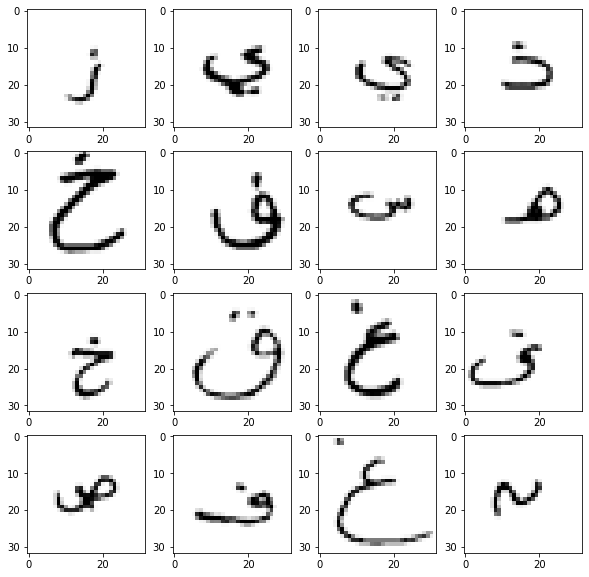

In [52]:
from sklearn.utils import shuffle

train_data_shuffle = shuffle(train_data)

plt.figure(figsize = (10,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums,row, i+1)
    plt.imshow(train_data_shuffle.iloc[i].values.reshape(32,32).squeeze().T,interpolation='nearest',cmap='Greys')
plt.show()

#### ** changing labals to alphabit**

I'm filtring the data frame by lable frequencies or chrachters now, using the famous groupby() method .

In [53]:
print("Amount of each labels")

# Change label to alphabets
alphabets_mapper = {0:'alef',1:'beh',2:'teh',3:'theh',4:'jeem',5:'hah',6:'khah',7:'dal',8:'thal',9:'reh',
                    10:'zain',11:'seen',12:'sheen',13:'sad',14:'dad',15:'tah',16:'zah',17:'ain',18:'ghain',
                    19:'feh',20:'qaf',21:'kaf',22:'lam',23:'meem',24:'noon',25:'heh',26:'waw',27:'yeh'}


dataset_alphabets = train_data.copy()
train_label_vis = train_label.replace(alphabets_mapper)
test_label_vis = test_label.replace(alphabets_mapper)

train_label

test_label

Amount of each labels


,label
0,0
1,1
2,1
3,2
4,2
...,...
3354,25
3355,26
3356,26
3357,27


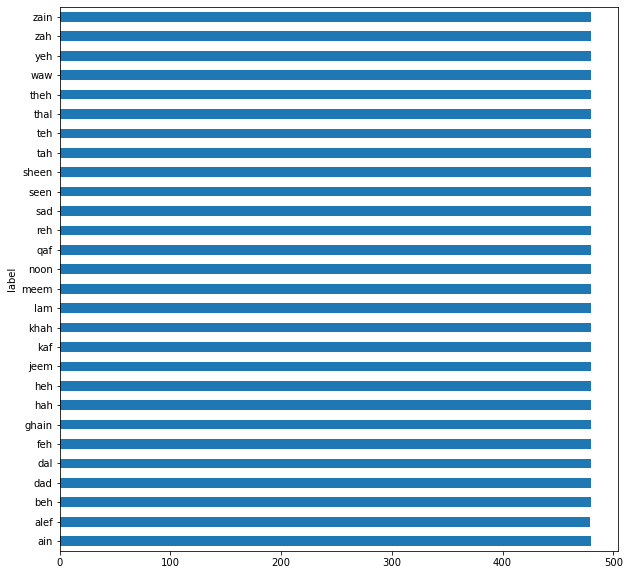

In [54]:
label_size = train_label_vis.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

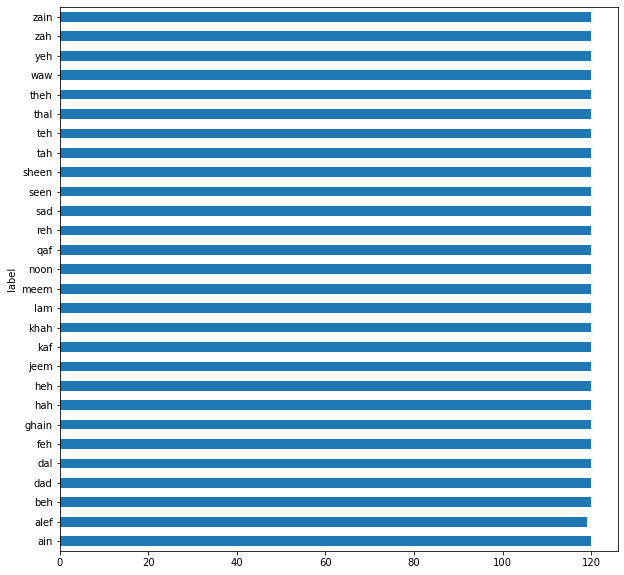

In [55]:
label2_size = test_label_vis.groupby('label').size()
label2_size.plot.barh(figsize=(10,10))
plt.show()

####  ** conclusion from the labels amount ** 
and here we come to a conclusion which is:-

In [56]:

print("train alef count:", label_size['alef'])
print("test alef count:", label2_size['alef'])


train alef count: 479
test alef count: 119


each alphabit has 598 sample 479 for the training, and 119 for the testing.

### 4.Data preprocessing
In order to achieve maximum efficiency, we need to preprocess the data before we feed it into the neural network.
Frist, I splite the data into training and test data then scale it, It's important to scale the data not to have a dominate variables as we know from the euclidean distance concept.

In [58]:
# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(train_data)

train_data = standard_scaler.transform(train_data)
test_data = standard_scaler.transform(test_data)

#### ** Taking a look on the data after scaling it ** 

Data after scaler


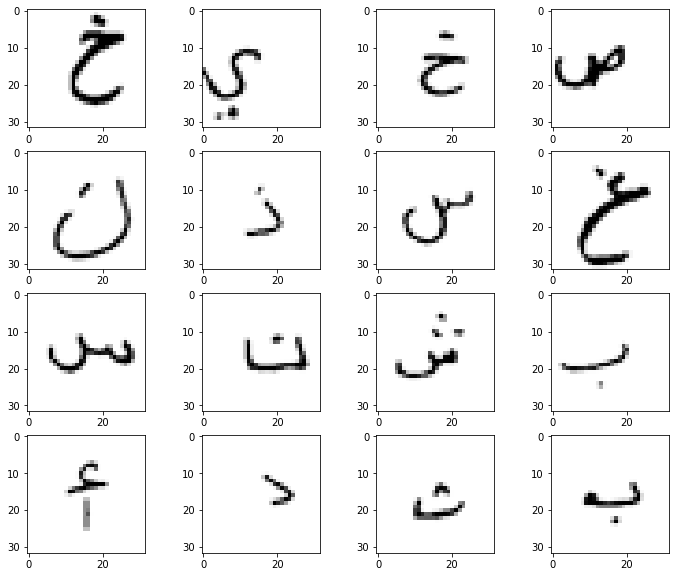

In [61]:
print("Data after scaler")
X_shuffle = shuffle(train_data)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(32,32).squeeze().T,interpolation='nearest', cmap='Greys')
plt.show()


in the code below **keras.utils.to_categorical() is used to convert the number, range from 0-25, into the one-hot array**

In [62]:
train_data = train_data.reshape(train_data.shape[0], 32, 32, 1).astype('float32')
test_data = test_data.reshape(test_data.shape[0], 32, 32, 1).astype('float32')

train_label = np_utils.to_categorical(train_label)
test_label = np_utils.to_categorical(test_label)

### 5.Building and Traning the model
First, we build the model. Then, we use the fit() method to train the network.

In [88]:
cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(32, 32, 1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2, 2)))
cls.add(Dropout(0.3))

cls.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
cls.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
cls.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
cls.add(Dropout(0.25))


cls.add(Flatten())
cls.add(Dense(units = 256, activation = 'relu'))
cls.add(Dense(units = 256, activation = "relu"))
cls.add(Dropout(0.5))
cls.add(Dense(28, activation='softmax'))

cls.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = cls.fit(train_data, train_label , validation_data=(test_data, test_label), epochs=18, batch_size=200, verbose=2)



Train on 13439 samples, validate on 3359 samples
Epoch 1/18
 - 24s - loss: 2.6033 - accuracy: 0.2191 - val_loss: 137.7240 - val_accuracy: 0.5210
Epoch 2/18
 - 24s - loss: 1.4336 - accuracy: 0.5309 - val_loss: 76.5933 - val_accuracy: 0.7333
Epoch 3/18
 - 23s - loss: 0.9046 - accuracy: 0.6890 - val_loss: 53.4358 - val_accuracy: 0.8264
Epoch 4/18
 - 23s - loss: 0.6548 - accuracy: 0.7826 - val_loss: 53.2164 - val_accuracy: 0.8622
Epoch 5/18
 - 23s - loss: 0.5323 - accuracy: 0.8179 - val_loss: 44.8008 - val_accuracy: 0.8890
Epoch 6/18
 - 23s - loss: 0.4472 - accuracy: 0.8495 - val_loss: 39.5074 - val_accuracy: 0.9029
Epoch 7/18
 - 24s - loss: 0.3744 - accuracy: 0.8723 - val_loss: 46.9660 - val_accuracy: 0.8994
Epoch 8/18
 - 23s - loss: 0.3209 - accuracy: 0.8901 - val_loss: 36.8874 - val_accuracy: 0.9250
Epoch 9/18
 - 23s - loss: 0.2786 - accuracy: 0.9034 - val_loss: 40.2008 - val_accuracy: 0.9214
Epoch 10/18
 - 23s - loss: 0.2474 - accuracy: 0.9145 - val_loss: 36.9877 - val_accuracy: 0.9268

### 6.Evaluation

In [89]:
scores = cls.evaluate(test_data, test_label, verbose=0)
print("CNN Score:",scores[1])


CNN Score: 0.9449240565299988


### booom, we got a 94.4% acc - let's visualize it   

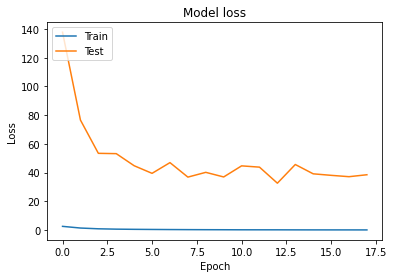

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Evaluation confusion matrix

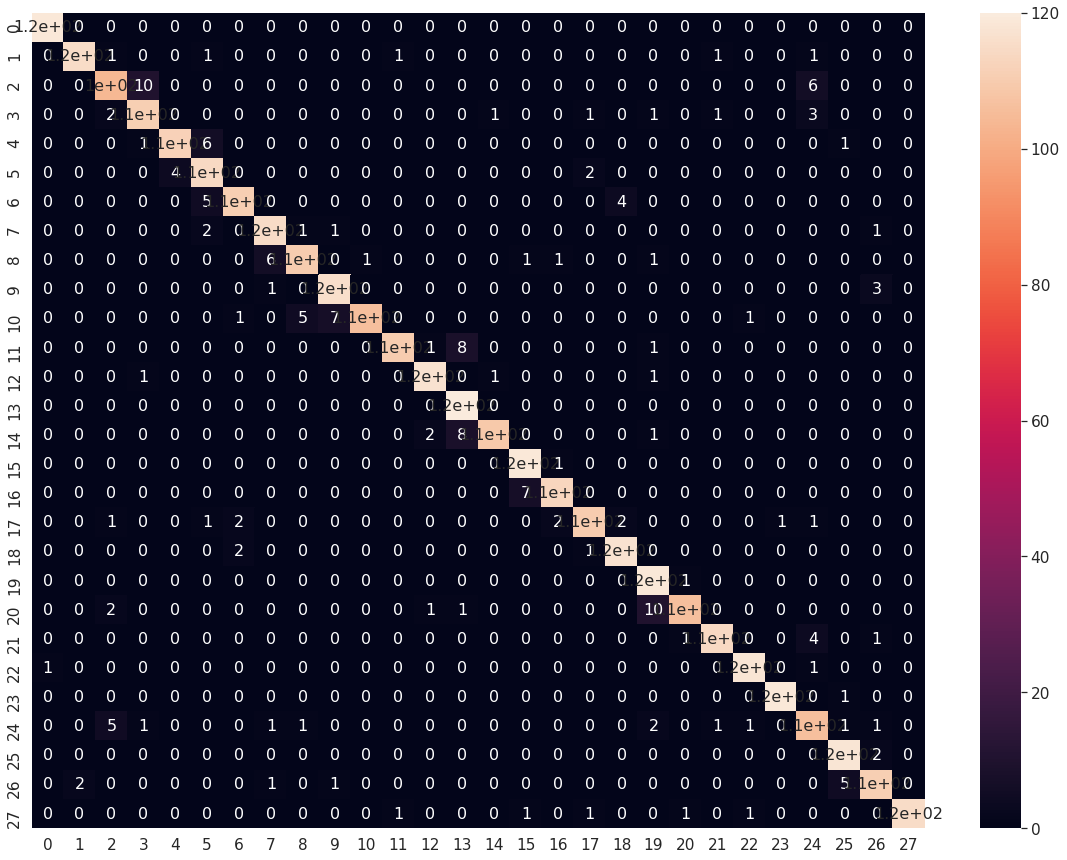

In [93]:
cm=confusion_matrix(test_label.argmax(axis=1),cls.predict(test_data).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(28),
                  range(28))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size



This report is submitted as partial fulfillment of the requirements of the Computer Arabization course’s practical exam


                                             Supervised by:
                                           Dr/ Marwa M. Fekry
                                           Dr/ Ahmed Hamed

                                            Ismailia, Egypt
                                              July 2020